In [1]:
import pandas as pd
df = pd.read_csv("amazon_review.csv", index_col=0)

In [2]:
df.sample(20)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1946,Hayrcc,5,Bought it fit in my new Galaxy S5. Nothing mor...,05-01-2014,337,1,0,1,1,1.000000,0.206549
2266,jerry-one,4,I would recommend this memory card to anyone t...,02-10-2014,67,0,0,0,0,0.000000,0.000000
2406,John D.,5,great product. I use san disk ultra 64 GB on ...,12-11-2013,391,0,0,0,0,0.000000,0.000000
1406,Donald E. Banka,5,I have never had a San Disk failure in 5 diffe...,29-12-2012,709,1,0,1,1,1.000000,0.206549
473,Arthur J LaForge,5,Works in all my sd devices. I bought this one ...,05-10-2014,64,0,0,0,0,0.000000,0.000000
1476,Dustin W. Scott,5,I have been using the same old 4gb card since ...,18-02-2013,658,0,0,0,0,0.000000,0.000000
1419,dorian,5,Using it in my HTC inspire and so far no probl...,12-02-2013,664,0,0,0,0,0.000000,0.000000
2425,John Lellis,5,I bought this Micro SD card to replace the che...,05-02-2014,306,0,0,0,0,0.000000,0.000000
4697,varma1986,5,I purchased this Micro SD card with adapter to...,10-06-2012,911,1,0,1,1,1.000000,0.206549
256,Amazon Customer,4,"Not as fast as advertised most of the time, ac...",27-06-2014,164,0,0,0,0,0.000000,0.000000


In [3]:
# df.isnull().sum()
df.shape

(4915, 11)

In [8]:
df = df.dropna()
df.isnull().sum()

reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pvras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pvras\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\pvras\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\pvras\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pvras\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

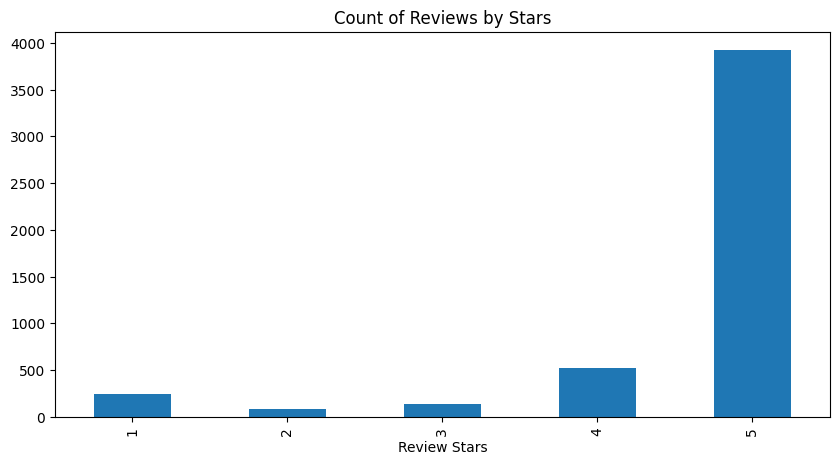

In [10]:
ax = df['overall'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars',figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 

In [13]:
sentiment = SentimentIntensityAnalyzer()
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
   res[i] = sentiment.polarity_scores(row.reviewText)

  0%|          | 0/4913 [00:00<?, ?it/s]

In [14]:
ratings = pd.DataFrame(res).T

In [15]:
df = pd.merge(df, ratings, left_index=True, right_index=True)

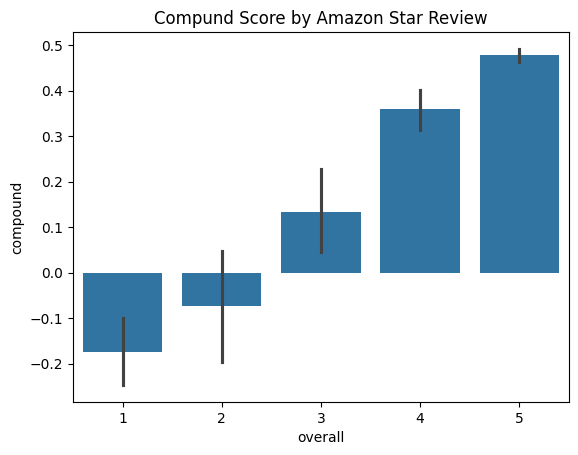

In [16]:
import seaborn as sns
ax = sns.barplot(data=df, x='overall', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

In [17]:
df.compound.value_counts(bins=3)

(0.334, 0.999]      3240
(-0.331, 0.334]     1101
(-0.999, -0.331]     572
Name: count, dtype: int64

In [18]:
df["sentiment"] = ["positive" if x >= 0.334 else "neutral" if x >= -0.331  else "negative" for x in df['compound']]

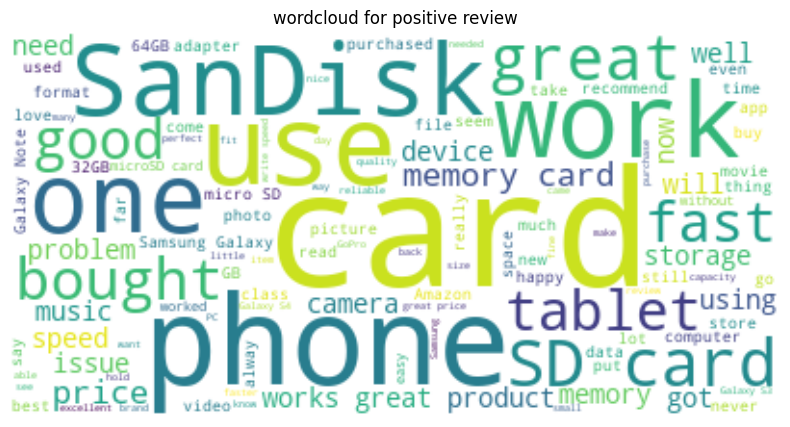

In [20]:
from wordcloud import WordCloud

text = " ".join(i for i in df[df['sentiment']=='positive']['reviewText'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

In [23]:
df = df.drop(columns=["reviewerName","reviewTime","overall","day_diff", "score_average_rating","score_pos_neg_diff","helpful_yes","helpful_no","neg", "pos", "neu","wilson_lower_bound", "compound","total_vote"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4913 entries, 1 to 4914
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  4913 non-null   object
 1   sentiment   4913 non-null   object
dtypes: object(2)
memory usage: 115.1+ KB


In [24]:
df.sample(5)

,reviewText,sentiment
680,I purchased this to expand the internal memory...,positive
1187,"Very fast, very big. Just wish it were a bit l...",positive
1110,Purchased this product for a new 7&#34; Garmin...,neutral
1895,I have both the Samsung Skyrocket and Note 2 A...,positive
1609,I have always been a sandisk guy. This cards ...,positive


In [25]:
import re
import string
def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number 
    text = re.sub('<.*?>+', '', text) # removing special characters, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
   
    #removing emoji: 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   

   # removing short form: 
    
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)
    
     
    return text
    
dt = df['reviewText'].apply(cleaning)

In [26]:
dt = pd.DataFrame(dt)
dt['sentiment'] = df['sentiment']
df = dt

In [28]:
# from nltk.corpus import stopwords
nltk.download('punkt')
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# stop_words = stopwords.words()
# dt['no_sw'] = dt['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pvras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from collections import Counter
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

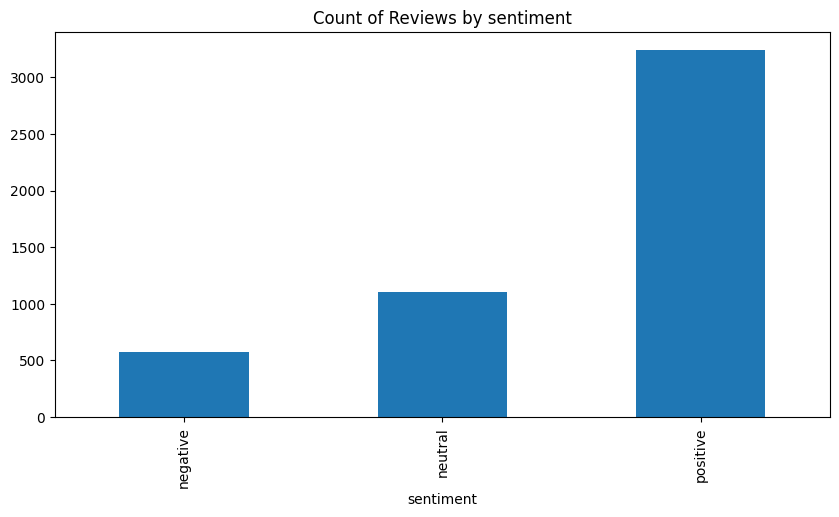

In [29]:
import matplotlib.pyplot as plt
ax = df['sentiment'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by sentiment',figsize=(10, 5))
plt.show()

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pvras\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
wordnet_lem = WordNetLemmatizer()

df['text'] = df['reviewText'].apply(wordnet_lem.lemmatize)
df

,reviewText,sentiment,text
1,purchased this for my device it worked as adve...,neutral,purchased this for my device it worked as adve...
2,it works as expected i should have sprung for ...,neutral,it works as expected i should have sprung for ...
3,this think has worked out greathad a diff bran...,positive,this think has worked out greathad a diff bran...
4,bought it with retail packaging arrived legit ...,positive,bought it with retail packaging arrived legit ...
5,its mini storage it doesnt do anything else a...,neutral,its mini storage it doesnt do anything else a...
...,...,...,...
4910,i bought this sandisk 16gb class to use with ...,neutral,i bought this sandisk 16gb class to use with ...
4911,used this for extending the capabilities of my...,neutral,used this for extending the capabilities of my...
4912,great card that is very fast and reliable it c...,positive,great card that is very fast and reliable it c...
4913,good amount of space for the stuff i want to d...,positive,good amount of space for the stuff i want to d...


In [32]:
df = df.drop(columns="reviewText")

In [33]:
df.sample(20)

,sentiment,text
1895,positive,i have both the samsung skyrocket and note an...
223,positive,i have a samsung note ii and was on the verge ...
791,neutral,sandisk is the premier brand in flash memory a...
3649,positive,its a great product and i am using in my samsu...
1744,positive,nice item and i have ordered several for my sm...
3205,positive,hopefully these will get cheaper but worth eve...
1438,neutral,bought this to add memory to a gig samsung ga...
3172,neutral,what can i say its memory the price was right ...
1347,positive,excellent storage and small works well and do...
1601,neutral,it is what it is and it works as required and ...


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(dt['text'])

C:\Users\pvras\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [35]:
from sklearn.model_selection import train_test_split
X=text_counts
y=df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import *

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 67.34%
------------------------------------------------
Confusion Matrix:
    0   1    2
0  33  16   77
1   9  18  191
2  10  18  611
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    negative       0.63      0.26      0.37       126
     neutral       0.35      0.08      0.13       218
    positive       0.70      0.96      0.81       639

    accuracy                           0.67       983
   macro avg       0.56      0.43      0.44       983
weighted avg       0.61      0.67      0.60       983

